# Selección de Parámetros, Validación y Test

Muchos algoritmos tienen asociados algunos parámetros que influyen en la complejidad del modelo que pueden aprender, llamados hiperparámetros. Cuando se usa **KNeighborsRegressor** y se cambia el número de vecinos a considerar, se obtiene progresivamente predicciones más y más suavizadas:

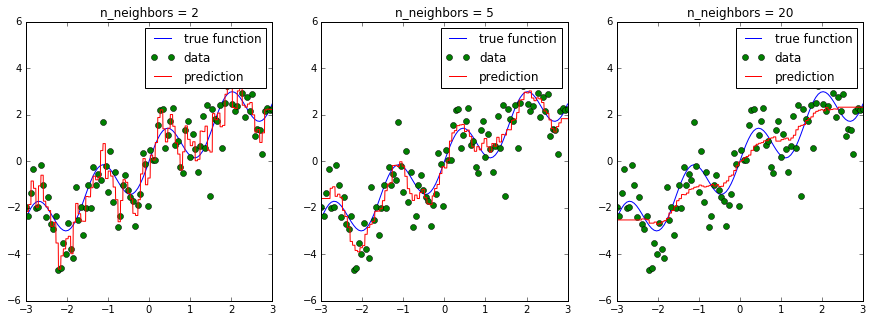

En la figura anterior se observan tres valores diferentes para **n_neighbors**. Con n_neighbors=2 los datos se sobre ajustan, el modelo es muy flexible y ajusta demasiado bien el ruido presente en el dataset. Para n_neighbors=20, el modelo no es suficientemente flexible y no se puede ajustar a la variación de los datos. Con n_neighbors=5 se ha encontrado un buen punto intermedio sin sufrir de sobre-entrenamiento ni de infra-entrenamiento. 

**Equilibrio bias-varianza** o **sobre-ajuste Vs infra-ajuste**

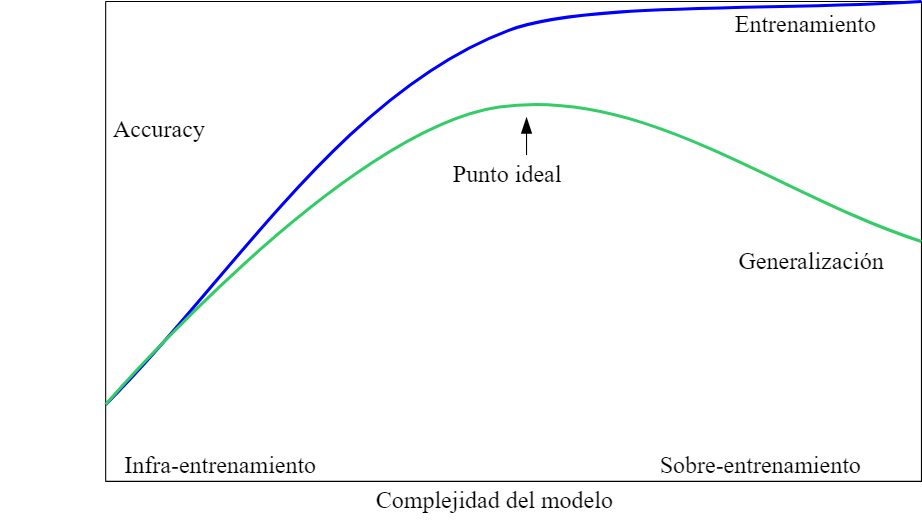

## Hiperparámetros, Sobreajuste e Infra-ajuste
No existe una regla general para llegar al punto óptimo, po rlo cual, el usuario debe encontrar el mejor equilibrio posible entre complejidad del modelo y su generalización. El usuario debe probar distintas opciones para los hiperparámetros con el fin de conseguirlo.

**Hiperparámetros:** Son quellos parámetros que podemos ajustar sobre un algoritmo de Machine Learning (algoritmo que a su vez ajusta los parámetros del modelo en función de los datos de entrenamiento). El ajuste suele hacerse mediante una búsqueda por fuerza bruta.

En el ejemplo que se ha trabajado anteriormente con el estimador KNeighborsRegressor se número de vecinos **k** es un hiperparámetro.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

In [24]:
# Dataset sintetico
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.normal(size=len(x))
X = x[:, np.newaxis]

In [5]:
cv = KFold(shuffle=True)

In [28]:
# Para cada parametro, se repite una validación cruzada
for n_neighbors in [1, 3, 4, 7, 8,9,10, 11, 20]:
    scores = cross_val_score(KNeighborsRegressor(n_neighbors=n_neighbors), X, y, cv=cv)
    print(f"n_neighbors: {n_neighbors}, rendimiento medio: {np.mean(scores)}")

n_neighbors: 1, rendimiento medio: 0.3566251321939327
n_neighbors: 3, rendimiento medio: 0.6554906103596301
n_neighbors: 4, rendimiento medio: 0.6563370262864101
n_neighbors: 7, rendimiento medio: 0.7027525564733208
n_neighbors: 8, rendimiento medio: 0.7295822778439441
n_neighbors: 9, rendimiento medio: 0.6957989667513271
n_neighbors: 10, rendimiento medio: 0.731688117450704
n_neighbors: 11, rendimiento medio: 0.6840598805418915
n_neighbors: 20, rendimiento medio: 0.6235481182420637


<div class="alert alert-success">
    Existe una función dentro de scikit-learn llamada <b>validation_plot</b> que produce una figura similar a la presentada en la parte superior. Representa un parámetro, para este caso, el número de vecinos, enfrentando a los errore de entrenamiento y validación (utilizando validación cruzada).
</div>

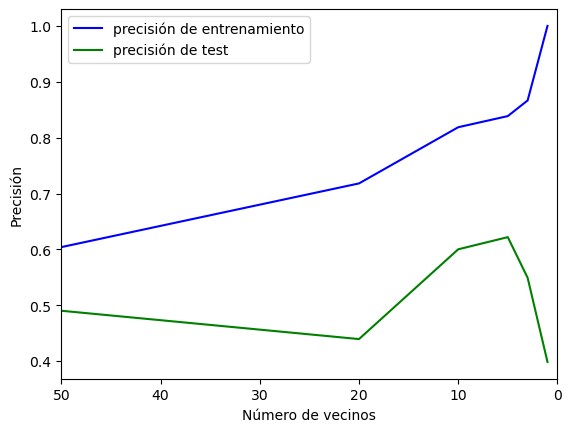

In [29]:
from sklearn.model_selection import validation_curve

n_neighbors = [1, 3, 5, 10, 20, 50]

train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, param_name="n_neighbors", param_range=n_neighbors, cv=cv)

plt.plot(n_neighbors, train_scores.mean(axis=1), 'b', label="precisión de entrenamiento")
plt.plot(n_neighbors, test_scores.mean(axis=1), 'g', label="precisión de test")
plt.ylabel('Precisión')
plt.xlabel('Número de vecinos')
plt.xlim([50, 0])
plt.legend(loc="best");

Si por ejemplo estamos hablando de **SVM (Máquinas de Soporte Vectorial)** (Otro algoritmo de Machine Learning), se tienen dos hiperparámetros $C$ y $gamma$, por lo cual se deben intentar todos los posibles combinaciones para ajustar el modelo.

In [30]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR

# Hacer validación cruzada para cada combinación de parámetros:
for C in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        scores = cross_val_score(SVR(C=C, gamma=gamma), X, y, cv=cv)
        print(F"C: {C}, gamma: {gamma}, valor medio de R^2: {np.mean(scores)}")

C: 0.001, gamma: 0.001, valor medio de R^2: -0.14802164759670103
C: 0.001, gamma: 0.01, valor medio de R^2: -0.1476847281705547
C: 0.001, gamma: 0.1, valor medio de R^2: -0.047922567894985835
C: 0.001, gamma: 1, valor medio de R^2: -0.256042342840196
C: 0.01, gamma: 0.001, valor medio de R^2: -0.23642094642335126
C: 0.01, gamma: 0.01, valor medio de R^2: -0.1206730296453579
C: 0.01, gamma: 0.1, valor medio de R^2: 0.035628300281131384
C: 0.01, gamma: 1, valor medio de R^2: -0.001971688322771703
C: 0.1, gamma: 0.001, valor medio de R^2: -0.059810805331426034
C: 0.1, gamma: 0.01, valor medio de R^2: 0.1343793838475257
C: 0.1, gamma: 0.1, valor medio de R^2: 0.534358194159372
C: 0.1, gamma: 1, valor medio de R^2: 0.49516371129344006
C: 1, gamma: 0.001, valor medio de R^2: 0.0741455352920059
C: 1, gamma: 0.01, valor medio de R^2: 0.5746946442286286
C: 1, gamma: 0.1, valor medio de R^2: 0.605958438442668
C: 1, gamma: 1, valor medio de R^2: 0.6558272545408453
C: 10, gamma: 0.001, valor medio

<div class="alert alert-success">
    Esto es un proceso que se hace frecuentemente en Machine Learning, por lo cual hay una clase de scikit-learn llamada <b>GridSearch</b> para ello. Esta clase utiliza un diccionario que describe los parámetros que deben probarse y un modelo a entrenar. En este diccionario, las llaves son los parámetros y los valores son las cantidades a probar.
</div>

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=3)

Una de las cosas interesantes de **GridSearchCV** es que es un meta-estimador. Utiliza un estimador y crea nuevos estimadores con sus hiperparámetros, por lo cual se puede llamar al método **fit** para entrenarlo.

In [32]:
grid.fit(X,y);

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END ............C=0.001, gamma=0.001;, score=-0.486 total time=   0.0s
[CV 2/10] END ............C=0.001, gamma=0.001;, score=-0.419 total time=   0.0s
[CV 3/10] END ............C=0.001, gamma=0.001;, score=-0.141 total time=   0.0s
[CV 4/10] END ............C=0.001, gamma=0.001;, score=-0.055 total time=   0.0s
[CV 5/10] END ............C=0.001, gamma=0.001;, score=-0.125 total time=   0.0s
[CV 6/10] END ............C=0.001, gamma=0.001;, score=-0.019 total time=   0.0s
[CV 7/10] END ............C=0.001, gamma=0.001;, score=-0.936 total time=   0.0s
[CV 8/10] END ............C=0.001, gamma=0.001;, score=-0.316 total time=   0.0s
[CV 9/10] END ............C=0.001, gamma=0.001;, score=-0.150 total time=   0.0s
[CV 10/10] END ...........C=0.001, gamma=0.001;, score=-0.073 total time=   0.0s
[CV 1/10] END .............C=0.001, gamma=0.01;, score=-0.480 total time=   0.0s
[CV 2/10] END .............C=0.001, gamma=0.01

**GridSearchCV** aplica un proceso un poco más complejo que solo realizar la prueba de valores mediante iteraciones. Primero, ejecua el bucle de validación cruzada para encontrar los mejores hiperparámetros, una vez encontrados, se ejecuta nuevamente el método **fit** sobre todos los datos (sin validación cruzada), contruyendo un nuevo modelo con los hiperparámetros óptimos obtenidos anteriormente.

Después, utilizando los métodos **predict** o **score** se pueden realizar una nueva predicción.

In [34]:
grid.score(X,y)

0.8089308761560754

Para observar los hiperparámetros obtenidos con **GridSearchCV** se usa el método **best_params_** y la puntuación correspondiente en el atributo **best_score_**.

In [35]:
print(grid.best_score_)

0.7099698329362323


In [15]:
print(grid.best_params_)

{'C': 10, 'gamma': 1}


Puede obtenerse datos más detallados sobre los resultados con el atributo **cv_results_**. Este retorna un diccionario el cual puede usarse para crear un DataFrame de Pandas.

In [16]:
type(grid.cv_results_)

dict

In [17]:
print(grid.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [36]:
import pandas as pd

cv_results = pd.DataFrame(grid.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001103,0.000298,0.000814,0.000411,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",-0.486472,-0.418728,-0.141443,-0.054955,-0.125494,-0.018652,-0.935931,-0.315959,-0.150438,-0.072932,-0.272100,0.267296,20
1,0.001106,0.000202,0.000701,0.000459,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",-0.479798,-0.415023,-0.136446,-0.053010,-0.122210,-0.015277,-0.928159,-0.312942,-0.147383,-0.069777,-0.268002,0.265856,19
2,0.001108,0.000300,0.000400,0.000490,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",-0.454281,-0.398624,-0.116335,-0.043921,-0.107151,0.000003,-0.897015,-0.300597,-0.135146,-0.054940,-0.250801,0.260669,16
3,0.001002,0.000007,0.000703,0.000460,0.001,1,"{'C': 0.001, 'gamma': 1}",-0.463580,-0.401024,-0.121810,-0.044147,-0.108684,-0.002669,-0.906074,-0.298311,-0.137912,-0.056517,-0.254073,0.262864,17
4,0.000908,0.000303,0.000398,0.000487,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",-0.478999,-0.414669,-0.135879,-0.052844,-0.121901,-0.014901,-0.927283,-0.312705,-0.147044,-0.069490,-0.267572,0.265683,18


In [39]:
cv_results_tiny = cv_results[['param_C', 'param_gamma', 'mean_test_score']]
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head()

,param_C,param_gamma,mean_test_score
19,10,1,0.709970
15,1,1,0.644663
14,1,0.1,0.591055
18,10,0.1,0.587733
17,10,0.01,0.539527


Puede presentarse un problema debido a la forma en que se ha estado utilizando incurriendo en lo que se denomina un error de probar varias hipótesis. Al tener muchas combinaciones de hiperparámetros, puede que algunas de ellas funciones mejor solo por aleteroridad y que el rendimiento que se obtenga con nuevos datos, no sea el mejor. Por lo tanto, es buena idea realizar una separación en entrenamiento y test antes de la búsqueda con **GridSearch**. Este tipo de división se denomina **Train, Test & Validation**, muy común en Machine Learning.

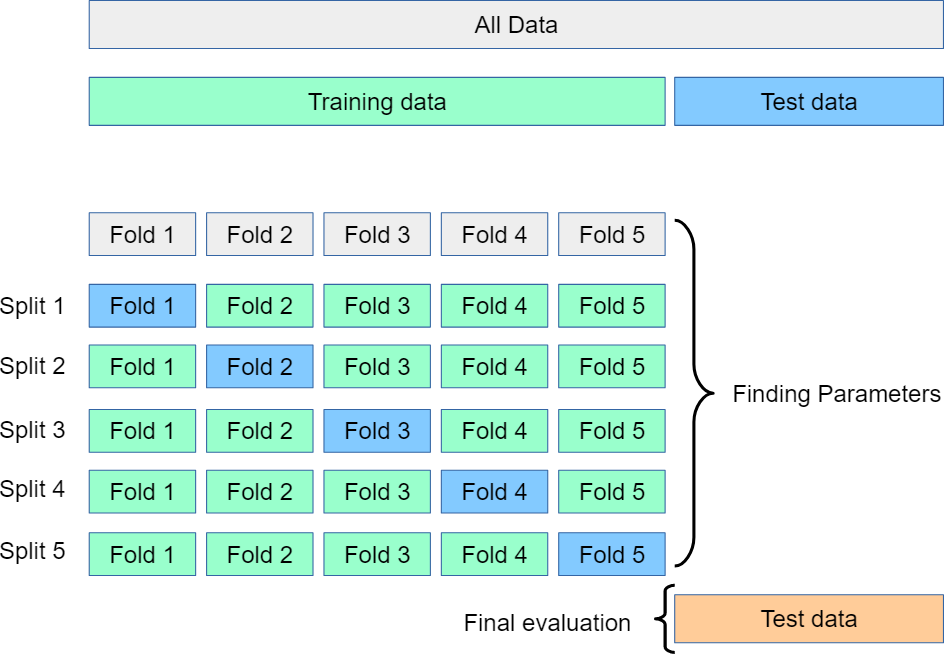

Este proceso se realiza dividiendo los datos con **train_test_split** y luego aplicando **GridSearchCV** al conjunto de datos **Train** y el **score** correspondiente solo con **Test**.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
cv = KFold(n_splits=10, shuffle=True)

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.7262035177984737

In [21]:
grid.best_params_

{'C': 10, 'gamma': 1}

En ocasiones se usa un esquema más simple, que parte los datos en los tres subconjuntos: train, validation y test.  Suele usarse cuando se cuenta con un conjunto de datos muy grande o si es posible entrenar muchos modelos mediante validación cruzada. Para realizar este tipo de partición se utiliza primero **train_test_split** y luego aplicar **GridSearchCV** con un **ShuffleSplit** y una sola iteración.

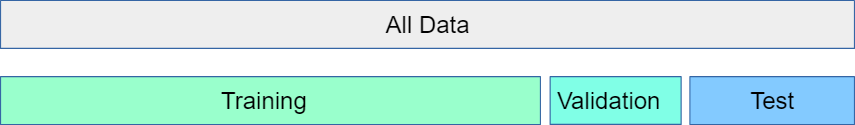

In [42]:
from sklearn.model_selection import train_test_split, ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
single_split_cv = ShuffleSplit(n_splits=1)

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=single_split_cv, verbose=3)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)

Fitting 1 folds for each of 20 candidates, totalling 20 fits
[CV 1/1] END .............C=0.001, gamma=0.001;, score=-0.071 total time=   0.0s
[CV 1/1] END ..............C=0.001, gamma=0.01;, score=-0.068 total time=   0.0s
[CV 1/1] END ...............C=0.001, gamma=0.1;, score=-0.057 total time=   0.0s
[CV 1/1] END .................C=0.001, gamma=1;, score=-0.058 total time=   0.0s
[CV 1/1] END ..............C=0.01, gamma=0.001;, score=-0.068 total time=   0.0s
[CV 1/1] END ...............C=0.01, gamma=0.01;, score=-0.047 total time=   0.0s
[CV 1/1] END .................C=0.01, gamma=0.1;, score=0.044 total time=   0.0s
[CV 1/1] END ...................C=0.01, gamma=1;, score=0.031 total time=   0.0s
[CV 1/1] END ...............C=0.1, gamma=0.001;, score=-0.044 total time=   0.0s
[CV 1/1] END .................C=0.1, gamma=0.01;, score=0.153 total time=   0.0s
[CV 1/1] END ..................C=0.1, gamma=0.1;, score=0.470 total time=   0.0s
[CV 1/1] END ....................C=0.1, gamma=1;

0.7262035177984737

A nivel computacional, esta forma es mucho más rápida, pero puede resultar en malos valores para los hiperparámetros, en otras palabras, un modelo con malos resultados de predicción.

In [43]:
clf = GridSearchCV(SVR(), param_grid=param_grid)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7262035177984737

<div class="alert alert-info">
    Aplica una búsqueda <b>grid</b> para encontrar el mejor valor del parámetro <b>n_neighbors</b> para KNeighborsClassifier utilizando el dataset digits.
</div>

